In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


In [12]:
def generate_results(runs, file, model):
    df_all = pd.DataFrame()
    for i in range(runs):
        df = pd.read_csv(file + '/model_' + str(model) + '_run_' + str(i+1) +'.csv')    
        df_all = pd.concat([df_all, df])
    return df_all

In [16]:
file = 'FIEM_base'
df_1 = generate_results(10, file, 7)
df_1 = df_1.drop(columns = ['Unnamed: 0']).groupby(['time', 'infection_status', 'risk_group']).mean().reset_index()
df_1['Model'] = 1

file = 'different_population'
df_2 = generate_results(10, file, 2)
df_2 = df_2.drop(columns = ['Unnamed: 0']).groupby(['time', 'infection_status', 'risk_group']).mean().reset_index()
df_2['Model'] = 2

df_3 = generate_results(10, file, 3)
df_3 = df_3.drop(columns = ['Unnamed: 0']).groupby(['time', 'infection_status', 'risk_group']).mean().reset_index()
df_3['Model'] = 3

df_4 = generate_results(10, file, 4)
df_4 = df_4.drop(columns = ['Unnamed: 0']).groupby(['time', 'infection_status', 'risk_group']).mean().reset_index()
df_4['Model'] = 4

df_5 = generate_results(10, file, 5)
df_5 = df_5.drop(columns = ['Unnamed: 0']).groupby(['time', 'infection_status', 'risk_group']).mean().reset_index()
df_5['Model'] = 5

econ_epi = pd.concat([df_1, df_2, df_3, df_4, df_5])

econ_epi = econ_epi[econ_epi['time'] > 0].reset_index().drop(columns = ['index'])

df_epi = econ_epi[['time', 'Model']].drop_duplicates().reset_index().drop(columns = ['index'])

In [17]:
df_epi['%I_econ_epi'] = econ_epi[econ_epi['infection_status'] == 'i'].groupby(['Model', 'time']).sum().reset_index()['count']/16000
df_epi['%S_econ_epi'] = econ_epi[econ_epi['infection_status'] == 's'].groupby(['Model','time']).sum().reset_index()['count']/16000
df_epi['%R_econ_epi'] = econ_epi[econ_epi['infection_status'] == 'r'].groupby(['Model','time']).sum().reset_index()['count']/16000

In [18]:
econ_epi = econ_epi[econ_epi['time']>0].reset_index().drop(columns = ['index'])
df_epi['%Work'] = econ_epi[econ_epi['risk_group'].str[:2] == 'g1'].groupby(['Model', 'time']).sum().reset_index()['count']/16000
df_epi['I_work'] = econ_epi[(econ_epi['risk_group'].str[:2] == 'g1')&\
       (econ_epi['infection_status'] == 'i')].groupby(['Model', 'time']).sum().reset_index()['count']
df_epi['%I_work'] = df_epi['I_work']/(df_epi['%I_econ_epi']*16000)
df_epi['S_work'] = econ_epi[(econ_epi['risk_group'].str[:2] == 'g1')&\
       (econ_epi['infection_status'] == 's')].groupby(['Model', 'time']).sum().reset_index()['count']
df_epi['%S_work'] = df_epi['S_work']/(df_epi['%S_econ_epi']*16000)
df_epi['R_work'] = econ_epi[(econ_epi['risk_group'].str[:2] == 'g1')&\
       (econ_epi['infection_status'] == 'r')].groupby(['Model', 'time']).sum().reset_index()['count']

df_epi['%R_work'] = df_epi['R_work']/(df_epi['%R_econ_epi']*16000)

In [21]:
df_results = pd.DataFrame()

df_results['time'] = df_1[(df_1['risk_group'].str[-2:] == '00')&(df_1['infection_status'] == 'i')].groupby('time').sum().index
df_results['%Infec_00'] = (df_1[(df_1['risk_group'].str[-2:] == '00')&(df_1['infection_status'] == 'i')].groupby('time').sum()['count']/4000)
df_results['%Infec_01'] = (df_1[(df_1['risk_group'].str[-2:] == '01')&(df_1['infection_status'] == 'i')].groupby('time').sum()['count']/4000)
df_results['%Infec_10'] = (df_1[(df_1['risk_group'].str[-2:] == '10')&(df_1['infection_status'] == 'i')].groupby('time').sum()['count']/4000)
df_results['%Infec_11'] = (df_1[(df_1['risk_group'].str[-2:] == '11')&(df_1['infection_status'] == 'i')].groupby('time').sum()['count']/4000)

df_results['%Work_00'] = df_1[(df_1['risk_group'] == 'g1-00')].groupby('time').sum()['count']/4000
df_results['%Work_01'] = df_1[(df_1['risk_group'] == 'g1-01')].groupby('time').sum()['count']/4000
df_results['%Work_10'] = df_1[(df_1['risk_group'] == 'g1-10')].groupby('time').sum()['count']/4000
df_results['%Work_11'] = df_1[(df_1['risk_group'] == 'g1-11')].groupby('time').sum()['count']/4000

df_results['%Infec_population'] = df_1[(df_1['infection_status'] == 'i')].groupby('time').sum()['count']/16000

df_results['%Work_00_i'] = (df_1[(df_1['risk_group'] == 'g1-00')&(df_1['infection_status'] == 'i')].groupby('time').sum()['count']/\
    df_1[(df_1['risk_group'].str[-2:] == '00')&(df_1['infection_status'] == 'i')].groupby('time').sum()['count'])
df_results['%Work_01_i'] = (df_1[(df_1['risk_group'] == 'g1-01')&(df_1['infection_status'] == 'i')].groupby('time').sum()['count']/\
    df_1[(df_1['risk_group'].str[-2:] == '01')&(df_1['infection_status'] == 'i')].groupby('time').sum()['count'])
df_results['%Work_10_i'] = (df_1[(df_1['risk_group'] == 'g1-10')&(df_1['infection_status'] == 'i')].groupby('time').sum()['count']/\
    df_1[(df_1['risk_group'].str[-2:] == '10')&(df_1['infection_status'] == 'i')].groupby('time').sum()['count'])
df_results['%Work_11_i'] = (df_1[(df_1['risk_group'] == 'g1-11')&(df_1['infection_status'] == 'i')].groupby('time').sum()['count']/\
    df_1[(df_1['risk_group'].str[-2:] == '11')&(df_1['infection_status'] == 'i')].groupby('time').sum()['count'])

df_results['%Work_00_s'] = (df_1[(df_1['risk_group'] == 'g1-00')&(df_1['infection_status'] == 's')].groupby('time').sum()['count']/\
    df_1[(df_1['risk_group'].str[-2:] == '00')&(df_1['infection_status'] == 's')].groupby('time').sum()['count'])
df_results['%Work_01_s'] = (df_1[(df_1['risk_group'] == 'g1-01')&(df_1['infection_status'] == 's')].groupby('time').sum()['count']/\
    df_1[(df_1['risk_group'].str[-2:] == '01')&(df_1['infection_status'] == 's')].groupby('time').sum()['count'])
df_results['%Work_10_s'] = (df_1[(df_1['risk_group'] == 'g1-10')&(df_1['infection_status'] == 's')].groupby('time').sum()['count']/\
    df_1[(df_1['risk_group'].str[-2:] == '10')&(df_1['infection_status'] == 's')].groupby('time').sum()['count'])
df_results['%Work_11_s'] = (df_1[(df_1['risk_group'] == 'g1-11')&(df_1['infection_status'] == 's')].groupby('time').sum()['count']/\
    df_1[(df_1['risk_group'].str[-2:] == '11')&(df_1['infection_status'] == 's')].groupby('time').sum()['count'])

df_results['%Work_00_r'] = (df_1[(df_1['risk_group'] == 'g1-00')&(df_1['infection_status'] == 'r')].groupby('time').sum()['count']/\
    df_1[(df_1['risk_group'].str[-2:] == '00')&(df_1['infection_status'] == 'r')].groupby('time').sum()['count'])
df_results['%Work_01_r'] = (df_1[(df_1['risk_group'] == 'g1-01')&(df_1['infection_status'] == 'r')].groupby('time').sum()['count']/\
    df_1[(df_1['risk_group'].str[-2:] == '01')&(df_1['infection_status'] == 'r')].groupby('time').sum()['count'])
df_results['%Work_10_r'] = (df_1[(df_1['risk_group'] == 'g1-10')&(df_1['infection_status'] == 'r')].groupby('time').sum()['count']/\
    df_1[(df_1['risk_group'].str[-2:] == '10')&(df_1['infection_status'] == 'r')].groupby('time').sum()['count'])
df_results['%Work_11_r'] = (df_1[(df_1['risk_group'] == 'g1-11')&(df_1['infection_status'] == 'r')].groupby('time').sum()['count']/\
    df_1[(df_1['risk_group'].str[-2:] == '11')&(df_1['infection_status'] == 'r')].groupby('time').sum()['count'])



In [22]:
color = ['Black', 'dodgerblue', 'skyblue', "crimson", "pink"]
labels = ['50% Vulnerable, 50% High-SES (Baseline)', '50% Vulnerable, 75% High-SES', '50% Vulnerable, 25% High-SES',
'75% Vulnerable, 50% High-SES', '25% Vulnerable, 50% High-SES']

/var/folders/fg/qtvw7sp54r91rm2skfzzb8ww0000gn/T/ipykernel_26251/1269235995.py:101: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/fg/qtvw7sp54r91rm2skfzzb8ww0000gn/T/ipykernel_26251/1269235995.py:115: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_xticklabels(ax0.get_xticks(), size=12)
/var/folders/fg/qtvw7sp54r91rm2skfzzb8ww0000gn/T/ipykernel_26251/1269235995.py:117: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticks(), size=12)


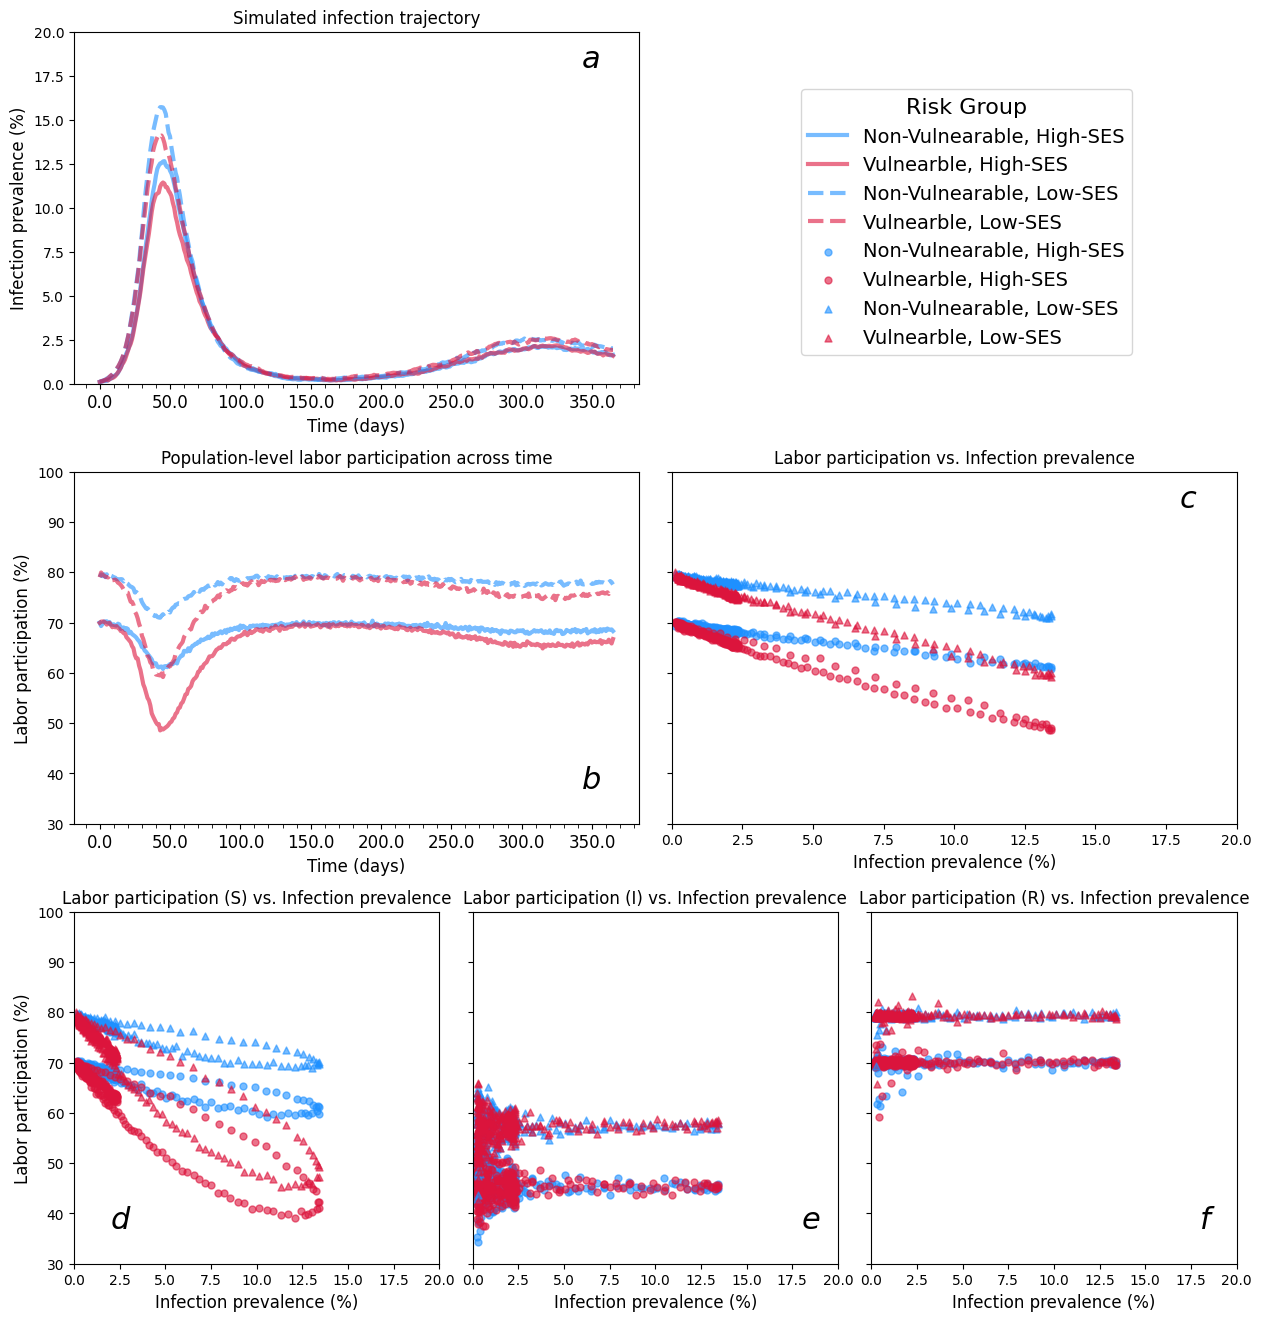

In [23]:
# Create figure
fig = plt.figure(figsize=(15, 16))

# Define GridSpec: 2 rows, 6 columns
# This approach uses an invisible middle column to balance the width of plots
gs = gridspec.GridSpec(3, 6, wspace=0.2, hspace=0.25)

ax0 = fig.add_subplot(gs[0, :3]) 

markers = ['o', '^']
# First row - two plots, each taking 3 columns (including the invisible middle column as spacing)
ax1 = fig.add_subplot(gs[1, :3])  # First row, spans first two columns
ax2 = fig.add_subplot(gs[1, 3:])  # First row, spans fourth and fifth columns (leaving a gap in the middle)

# Second row - three plots, evenly distributed
ax3 = fig.add_subplot(gs[2, 0:2])  # Second row, spans first two columns
ax4 = fig.add_subplot(gs[2, 2:4])  # Second row, spans middle two columns
ax5 = fig.add_subplot(gs[2, 4:])  # Second row, spans last two columns

width = 3
dot_size = 25
alpha = 0.6
    
ax0.plot(df_results['time'], df_results['%Infec_00']*100, color = color[1], alpha = alpha, linewidth = width, label = 'Non-Vulnearable, High-SES')
ax0.plot(df_results['time'], df_results['%Infec_10']*100, color = color[3], alpha = alpha, linewidth = width, label = 'Vulnearble, High-SES')
ax0.plot(df_results['time'], df_results['%Infec_01']*100, color = color[1], alpha = alpha, linewidth = width, linestyle = '--', label = 'Non-Vulnearable, Low-SES')
ax0.plot(df_results['time'], df_results['%Infec_11']*100, color = color[3], alpha = alpha, linewidth = width, linestyle = '--', label = 'Vulnearble, Low-SES')


ax1.plot(df_results['time'], df_results['%Work_00']*100, color = color[1], alpha = alpha, linewidth = width)
ax1.plot(df_results['time'], df_results['%Work_10']*100, color = color[3], alpha = alpha, linewidth = width)
ax1.plot(df_results['time'], df_results['%Work_01']*100, color = color[1], alpha = alpha, linestyle = '--', linewidth = width)
ax1.plot(df_results['time'], df_results['%Work_11']*100, color = color[3], alpha = alpha, linestyle = '--', linewidth = width)

ax2.scatter(df_results['%Infec_population']*100, df_results['%Work_00']*100, color = color[1], alpha = alpha, s= dot_size, marker = markers[0])
ax2.scatter(df_results['%Infec_population']*100, df_results['%Work_10']*100, color = color[3], alpha = alpha, s= dot_size, marker = markers[0])
ax2.scatter(df_results['%Infec_population']*100, df_results['%Work_01']*100, color = color[1], alpha = alpha, s= dot_size, marker = markers[1])
ax2.scatter(df_results['%Infec_population']*100, df_results['%Work_11']*100, color = color[3], alpha = alpha, s= dot_size, marker = markers[1])

ax3.scatter(df_results['%Infec_population']*100, df_results['%Work_00_s']*100, color = color[1], alpha = alpha, s= dot_size, marker = markers[0])
ax3.scatter(df_results['%Infec_population']*100, df_results['%Work_10_s']*100, color = color[3], alpha = alpha, s= dot_size, marker = markers[0])
ax3.scatter(df_results['%Infec_population']*100, df_results['%Work_01_s']*100, color = color[1], alpha = alpha, s= dot_size, marker = markers[1])
ax3.scatter(df_results['%Infec_population']*100, df_results['%Work_11_s']*100, color = color[3], alpha = alpha, s= dot_size, marker = markers[1])

ax4.scatter(df_results[df_results['time'] >5]['%Infec_population']*100, df_results[df_results['time'] >5]['%Work_00_i']*100, 
            color = color[1], alpha = alpha, s= dot_size, marker = markers[0], label = 'Non-Vulnearable, High-SES')
ax4.scatter(df_results[df_results['time'] >5]['%Infec_population']*100, df_results[df_results['time'] >5]['%Work_10_i']*100, 
            color = color[3], alpha = alpha, s= dot_size, marker = markers[0], label = 'Vulnearble, High-SES')
ax4.scatter(df_results[df_results['time'] >5]['%Infec_population']*100, df_results[df_results['time'] >5]['%Work_01_i']*100, 
            color = color[1], alpha = alpha, s= dot_size, marker = markers[1], label = 'Non-Vulnearable, Low-SES')
ax4.scatter(df_results[df_results['time'] >5]['%Infec_population']*100, df_results[df_results['time'] >5]['%Work_11_i']*100, 
            color = color[3], alpha = alpha, s= dot_size, marker = markers[1], label = 'Vulnearble, Low-SES')

ax5.scatter(df_results[df_results['time'] >5]['%Infec_population']*100, df_results[df_results['time'] >5]['%Work_00_r']*100, 
            color = color[1], alpha = alpha, s= dot_size, marker = markers[0])
ax5.scatter(df_results[df_results['time'] >5]['%Infec_population']*100, df_results[df_results['time'] >5]['%Work_10_r']*100, 
            color = color[3], alpha = alpha, s= dot_size, marker = markers[0])
ax5.scatter(df_results[df_results['time'] >5]['%Infec_population']*100, df_results[df_results['time'] >5]['%Work_01_r']*100, 
            color = color[1], alpha = alpha, s= dot_size, marker = markers[1])
ax5.scatter(df_results[df_results['time'] >5]['%Infec_population']*100, df_results[df_results['time'] >5]['%Work_11_r']*100, 
            color = color[3], alpha = alpha, s= dot_size, marker = markers[1])


ax0.set_xlabel('Time (days)', fontsize= 12)
ax0.set_ylabel('Infection prevalence (%)', fontsize= 12)
ax0.set_ylim([0, 20])

ax1.set_xlabel('Time (days)', fontsize= 12)
ax2.set_xlabel('Infection prevalence (%)', fontsize= 12) 
ax3.set_xlabel('Infection prevalence (%)', fontsize= 12) 
ax4.set_xlabel('Infection prevalence (%)', fontsize= 12) 
ax5.set_xlabel('Infection prevalence (%)', fontsize= 12) 
ax1.set_ylabel('Labor participation (%)', fontsize= 12)

ax3.set_ylabel('Labor participation (%)', fontsize= 12)

ax2.set_yticklabels([])
ax1.set_ylim([30, 100])
ax2.set_ylim([30, 100])

ax3.set_ylim([30, 100])
ax4.set_ylim([30, 100])
ax5.set_ylim([30, 100])

ax2.set_xlim([0, 20])
ax3.set_xlim([0, 20])
ax4.set_xlim([0, 20])
ax5.set_xlim([0, 20])

ax4.set_yticklabels([])
ax5.set_yticklabels([])

ax0.set_title('Simulated infection trajectory', fontsize = 12)
ax1.set_title('Population-level labor participation across time', fontsize = 12)
ax2.set_title('Labor participation vs. Infection prevalence', fontsize = 12)

ax3.set_title('Labor participation (S) vs. Infection prevalence', fontsize = 12)
ax4.set_title('Labor participation (I) vs. Infection prevalence', fontsize = 12)
ax5.set_title('Labor participation (R) vs. Infection prevalence',  fontsize = 12)

plt.tight_layout()
legend_properties = {'weight':'bold'}
# fig.legend(prop=legend_properties, loc='upper center',
#            ncol = 5, bbox_to_anchor=(0.5, -0.02), fontsize = 25)
fig.legend(loc='upper center',
           ncol = 1, bbox_to_anchor=(0.72, .85), fontsize = 14, title = 'Risk Group', title_fontsize=16)

plt.text(0.9, 0.9, "a", transform=ax0.transAxes, fontstyle = 'italic', fontsize = 22)
plt.text(0.9, 0.1, "b", transform=ax1.transAxes, fontstyle = 'italic', fontsize = 22)
plt.text(0.9, 0.9, "c", transform=ax2.transAxes, fontstyle = 'italic', fontsize = 22)
plt.text(0.1, 0.1, "d", transform=ax3.transAxes, fontstyle = 'italic', fontsize = 22)
plt.text(0.9, 0.1, "e", transform=ax4.transAxes, fontstyle = 'italic', fontsize = 22)
plt.text(0.9, 0.1, "f", transform=ax5.transAxes, fontstyle = 'italic', fontsize = 22)

ax0.set_xticklabels(ax0.get_xticks(), size=12)
# ax0.set_yticklabels([0.0, 2, 4, 6, 8, 10, 11, 14, 16, 20], weight='bold', size=12)
ax1.set_xticklabels(ax1.get_xticks(), size=12)
# ax1.set_yticklabels([30, 40, 50, 60, 70, 80, 90, 100], weight='bold', size=12)
# ax2.set_xticklabels([-2, 0.0, 2, 4, 6, 8, 10, 11, 14], weight='bold', size=12)

# ax3.set_xticklabels([-2, 0.0, 2, 4, 6, 8, 10, 11], weight='bold', size=12)
# ax4.set_xticklabels([-2, 0.0, 2, 4, 6, 8, 10, 11], weight='bold', size=12)
# ax5.set_xticklabels([-2, 0.0, 2, 4, 6, 8, 10, 11, 14], weight='bold', size=12)

# ax0.set_yticklabels([0.0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20], weight='bold', size=14)
# ax3.set_yticklabels([30, 40, 50, 60, 70, 80, 90, 100], weight='bold', size=14)

ax0.minorticks_on()

# Customize minor ticks (remove labels)
ax0.tick_params(axis='x', which='minor', length=3, color='black', labelsize=0)
ax0.tick_params(axis='y', which='minor', length=0, color='black', labelsize=0)

ax1.minorticks_on()

# Customize minor ticks (remove labels)
ax1.tick_params(axis='x', which='minor', length=3, color='black', labelsize=0)
ax1.tick_params(axis='y', which='minor', length=0, color='black', labelsize=0)
# ax1.set_xticks(weight = 'bold')
# plt.yticks(weight = 'bold')
plt.show()